# target

compare truth level info with nominal

1. event number match

2. p4 vector dR match (bbll)

In [6]:
import os,shutil
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper

In [7]:
# 1. get tfile
filename = "user.cgarvey.32744802._000002.output.root"
file = TFile(filename)
# 2. get ttree
nominal = file.Get("nominal")
truth = file.Get("truth")
print(nominal.GetEntries(), truth.GetEntries())

258576 4580000


In [8]:
eventNumber = TH1D ("eventNumber ","eventNumber" ,50 ,0,50)


In [9]:
eventNumber.Reset()
# event match
nentry = 0
nominal.GetEntry(nentry)
nnumber = getattr(nominal, "eventNumber")
# for i in range(truth.GetEntries()):
for i in range(20000):
    truth.GetEntry(i)
    tnumber = getattr(truth, "eventNumber")
    if tnumber == nnumber:
        #####################################################
        ############# start analysis from here ##############
        #####################################################

        eventNumber.Fill(nnumber- tnumber)
        # print(tnumber,nnumber)
        # construct p4 vector 
        ## truth level llbb
        helper.GetP4fromTruth(truth, 'obj')
        pass
        

        ## nominal level llbb (same as in minimax_lb.ipynb)
        p4s_lep = helper.GetLorenzP4List(nominal, 'lep')
        p4s_bjet = helper.GetLorenzP4List(nominal,'bjet')

        # dR match p4 vector

        # draw the correct combination

        #####################################################
        ############# end analysis from here ################
        #####################################################
        nentry += 1
        nominal.GetEntry(nentry)
        nnumber = getattr(nominal, "eventNumber")
        
        
        

101633640


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


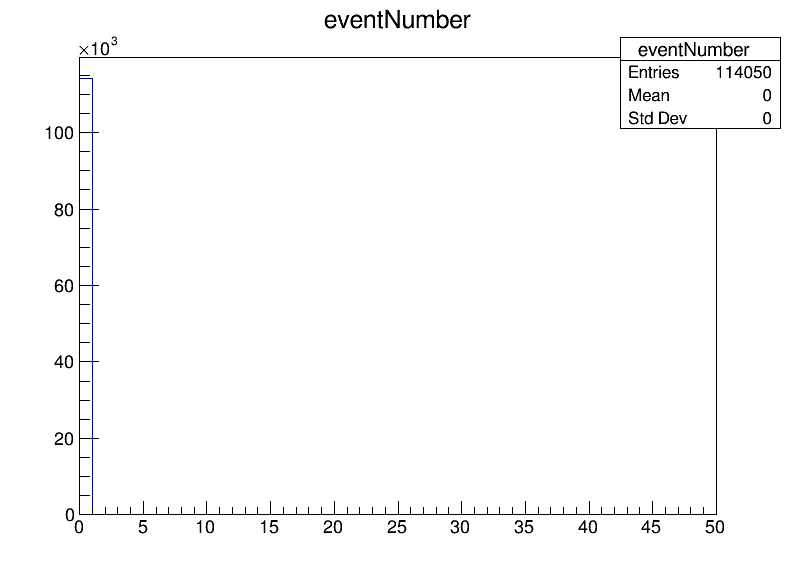

In [11]:
c1 = TCanvas('c1', 'canvas1', 0, 0, 800, 600 )
eventNumber.Draw()
c1.Draw()